In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset1 = pd.read_csv('dlexp_1.csv')
X = dataset1[['INPUT']].values
y = dataset1[['OUTPUT']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
# Name : V KAMALESH VIJAYAKUMAR
# Register Number : 212224110028
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(1, 8)
        self.fc2=nn.Linear(8, 10)
        self.fc3=nn.Linear(10, 1)
        self.relu=nn.ReLU()
        self.history={'loss':[]}

  def forward(self,x):
        x=self.relu(self.fc1(x))
        x=self.relu(self.fc2(x))
        x=self.fc3(x)
        return x


In [ ]:
# Initialize the Model, Loss Function, and Optimizer
ai_brain = NeuralNet()
criterion=nn.MSELoss()
optimizer=optim.RMSprop(ai_brain.parameters(), lr=0.001)

In [ ]:
# Name : V KAMALESH VIJAYAKUMAR
# Register Number : 212224110028
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    # Write your code here
    for epoch in range(epochs):
      optimizer.zero_grad()
      loss=criterion(ai_brain(X_train),y_train)
      loss.backward()
      optimizer.step()

      ai_brain.history['loss'].append(loss.item())
      if epoch % 200 == 0:
          print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')


In [ ]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch [0/2000], Loss: 374.148102
Epoch [200/2000], Loss: 252.633286
Epoch [400/2000], Loss: 114.105598
Epoch [600/2000], Loss: 31.905914
Epoch [800/2000], Loss: 19.781836
Epoch [1000/2000], Loss: 12.128818
Epoch [1200/2000], Loss: 4.646966
Epoch [1400/2000], Loss: 0.620871
Epoch [1600/2000], Loss: 0.003009
Epoch [1800/2000], Loss: 0.000000


In [ ]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 0.000147


In [ ]:
loss_df = pd.DataFrame(ai_brain.history)

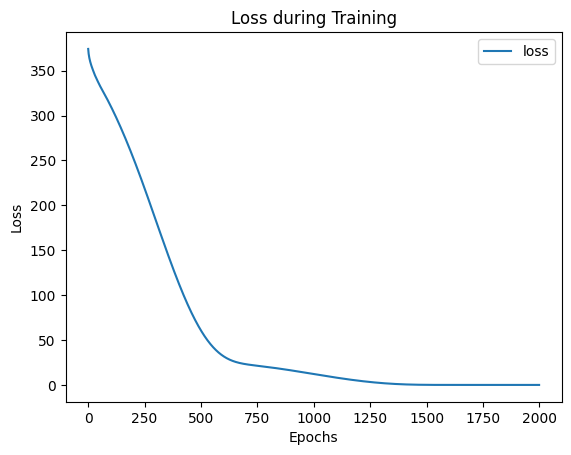

In [ ]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [ ]:
from google.colab import files
files.upload()

import tensorflow as tf
import pandas as pd
import numpy as np

data=pd.read_csv("dlexp_1.csv")

X=data.iloc[:,0].values.reshape(-1,1).astype(np.float32)
y=data.iloc[:,1].values.reshape(-1,1).astype(np.float32)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu',input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

loss_fn=tf.keras.losses.MeanSquaredError()
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)

epochs=2000

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions=model(X,training=True)
        loss=loss_fn(y,predictions)
    gradients=tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients,model.trainable_variables))
    if epoch%200==0:
        print(f"Epoch[{epoch}/{epochs}], loss : {loss.numpy():.6f}")

test_loss=loss_fn(y,model(X,training=False))
print("\nTest loss:",test_loss.numpy())


Saving dlexp_1.csv to dlexp_1 (1).csv


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch[0/2000], loss : 433.559753
Epoch[200/2000], loss : 0.002306
Epoch[400/2000], loss : 0.000553
Epoch[600/2000], loss : 0.000076
Epoch[800/2000], loss : 0.000006
Epoch[1000/2000], loss : 0.000000
Epoch[1200/2000], loss : 0.000000
Epoch[1400/2000], loss : 0.000000
Epoch[1600/2000], loss : 0.000000
Epoch[1800/2000], loss : 0.000000

Test loss: 3.6607163e-12


In [ ]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 19.008230209350586
